In [5]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [6]:
london = pd.read_csv('london_weekdays.csv')
london = london.drop(columns=['Unnamed: 0'])

#To remove outliers from realSum 
# Calculate the quartiles
Q1 = london['realSum'].quantile(0.25)
Q3 = london['realSum'].quantile(0.75)

# Remove outliers of realSum
london = london.loc[((london['realSum'] > (Q1 - 1.5 * (Q3 - Q1))) & (london['realSum'] < (Q3 + 1.5 * (Q3 - Q1))))]
london.shape

#Apply categorical label to columns 
london[['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']].apply(lambda x: x.astype('category'))

#Convert Roomtype to oridinal 
london["room_type"] = london["room_type"].replace({'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2})
london.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,570.098074,2,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,297.984430,1,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,336.790611,1,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,226.722171,1,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,256.355982,1,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


In [10]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(london["realSum"]).values.ravel()
x = pd.DataFrame(london[["person_capacity", "bedrooms", "dist", "attr_index_norm", "rest_index_norm", "room_type", "biz"]])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_train.head())

(3493, 7)
(874, 7)
(3493,)
(874,)
      person_capacity  bedrooms      dist  attr_index_norm  rest_index_norm  \
4130              4.0         1  6.149665        14.480144         8.080279   
68                4.0         1  4.737795        19.045424        11.740786   
3637              4.0         1  6.019318        15.042791         7.949671   
1687              2.0         1  1.620700        36.815061        23.727684   
2508              2.0         0  3.527168        24.612834        15.277090   

      room_type  biz  
4130          2    1  
68            2    1  
3637          1    1  
1687          2    1  
2508          2    1  


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6836538178364926
Mean Squared Error (MSE) 	: 9606.871034663447



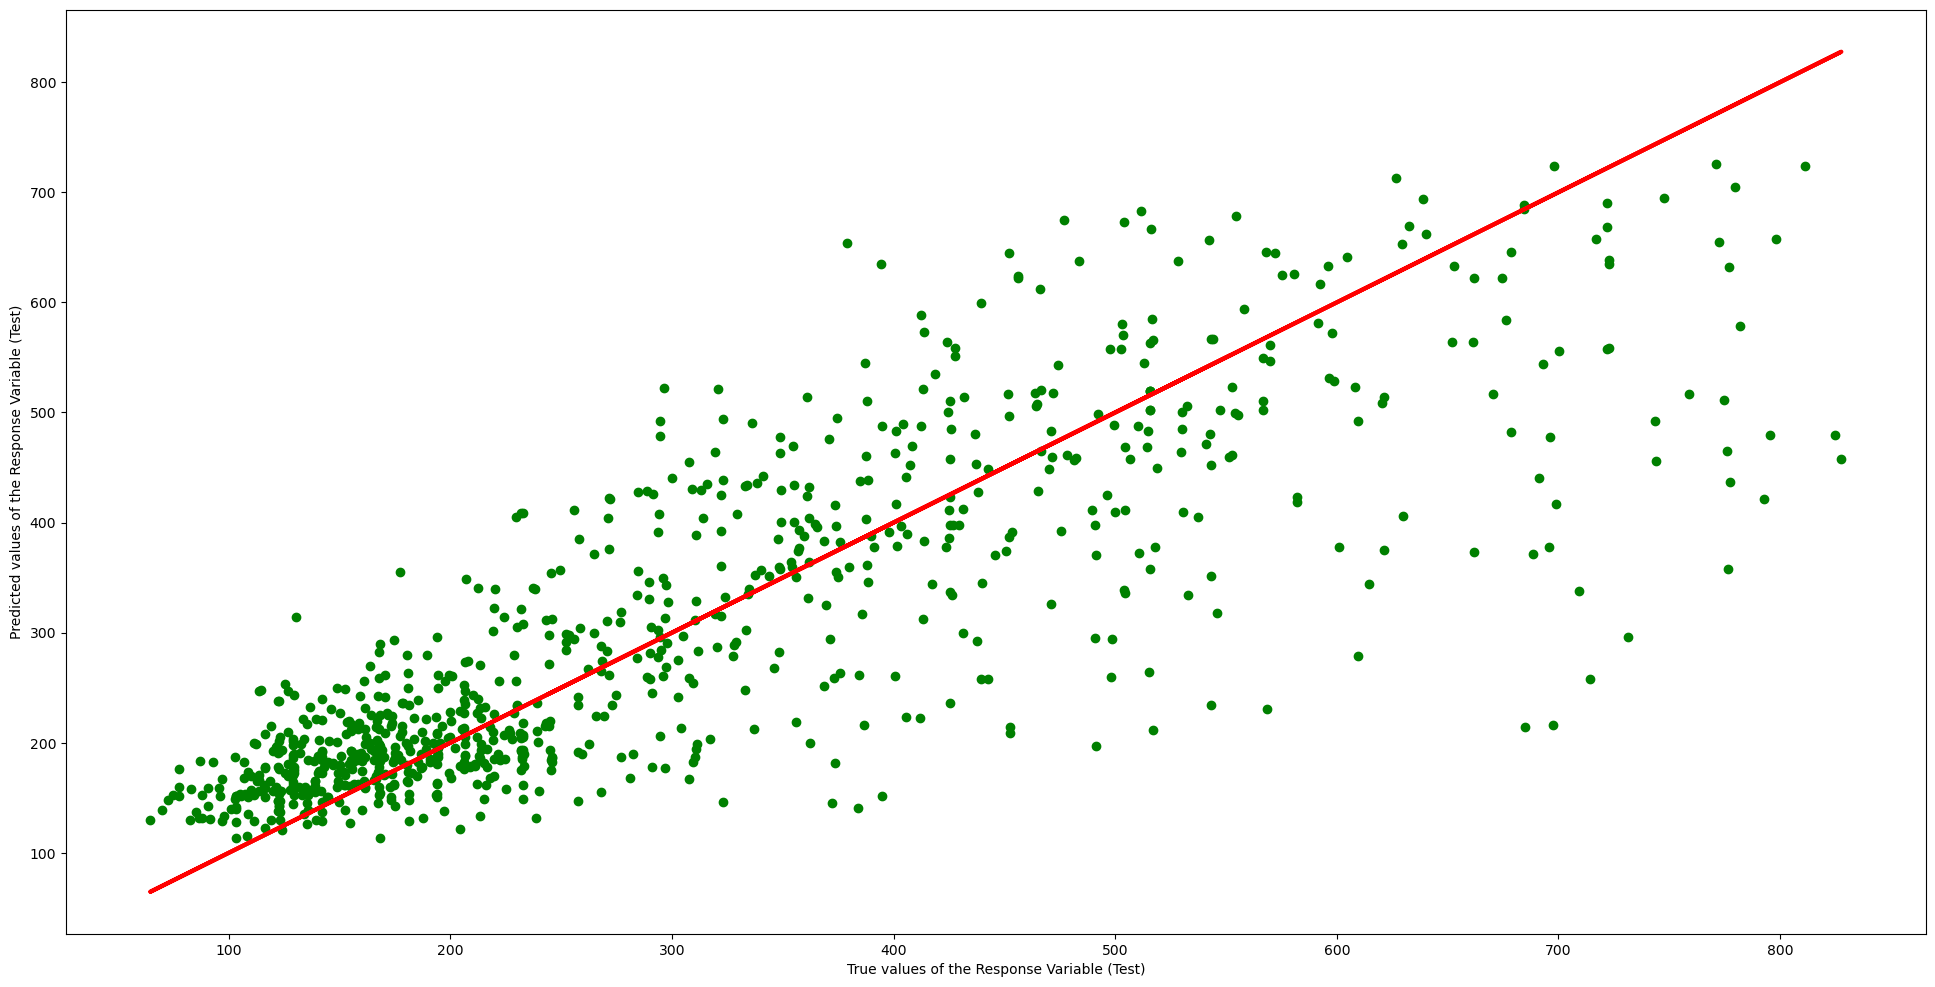

In [34]:
#gb = HistGradientBoostingRegressor(learning_rate=0.1, max_depth=10, random_state=42)
hgb = HistGradientBoostingRegressor(max_iter=100, random_state=0)
hgb.fit(x_train, y_train)
y_test_pred = hgb.predict(x_test)


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", hgb.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(y_test, y_test_pred, color = "green")
axes.plot(y_test, y_test, linewidth = 3,color = "red")
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6583716556687552
Mean Squared Error (MSE) 	: 10374.645343687236



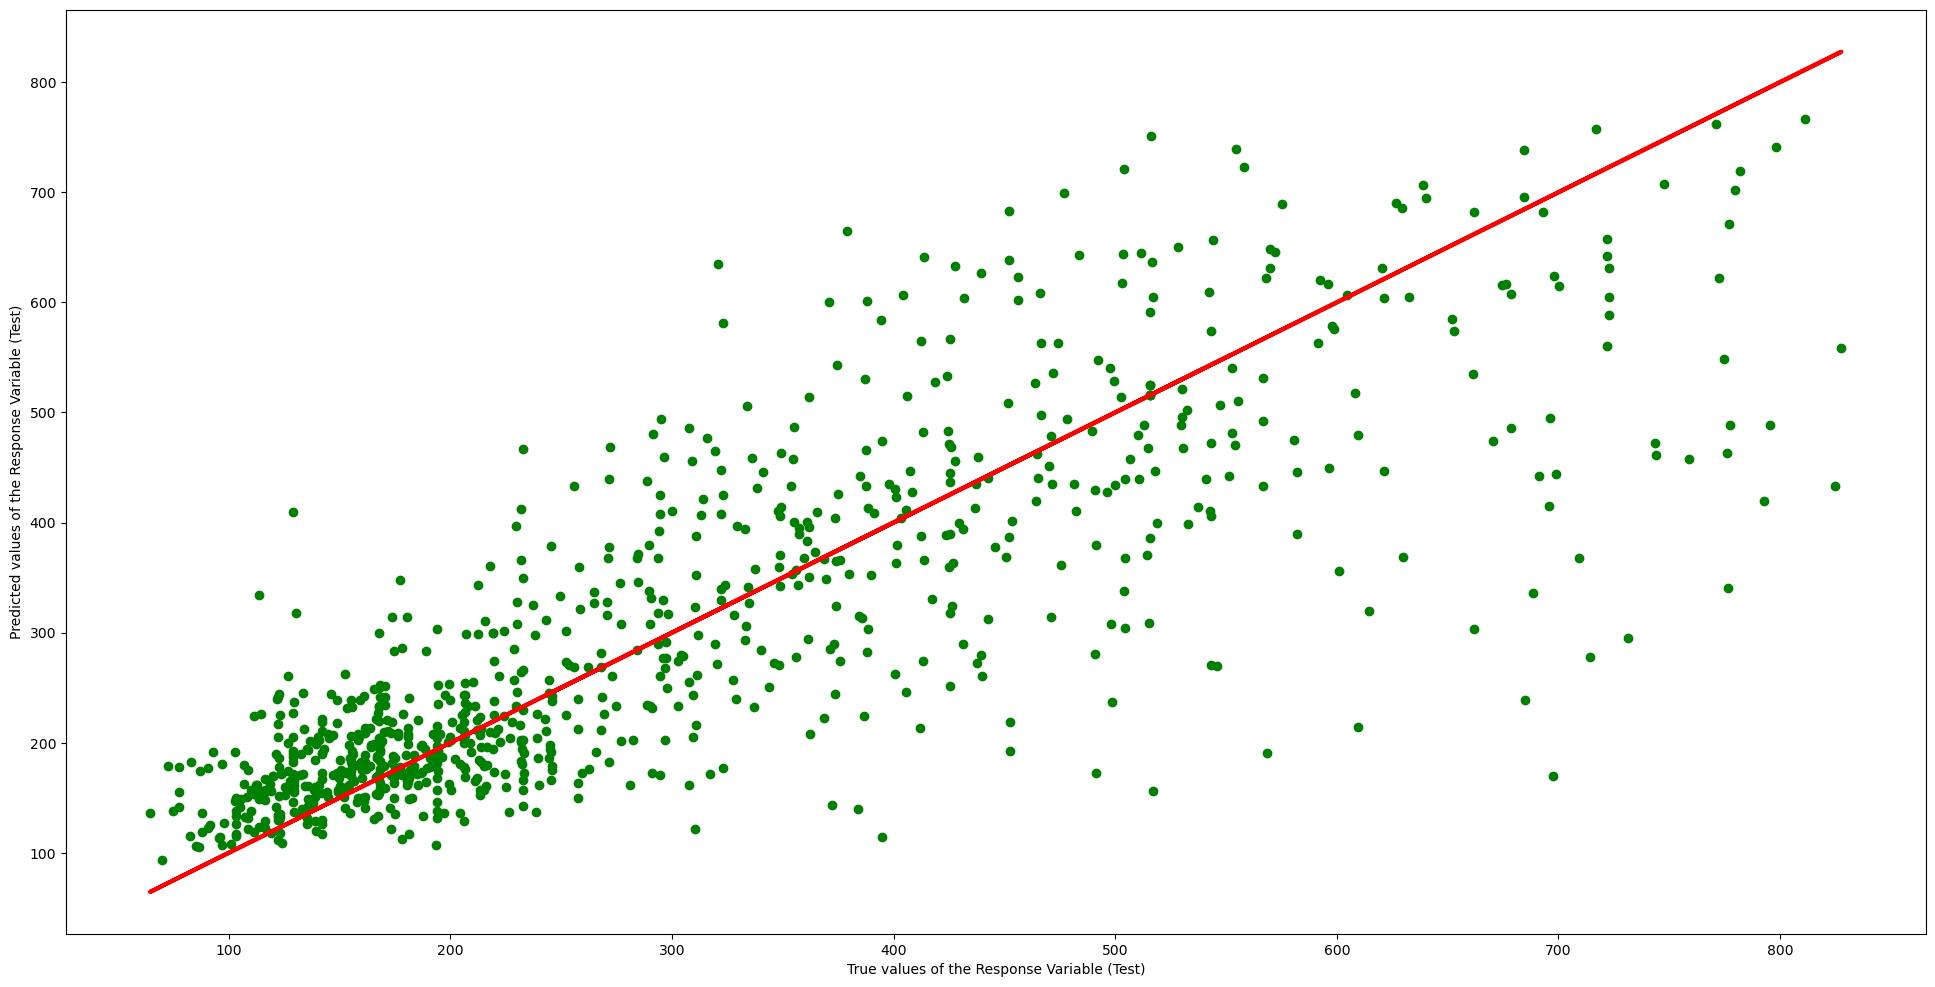

In [33]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate = 0.1, max_depth = 10, random_state=42)
gb.fit(x_train, y_train)
y_test_pred = gb.predict(x_test)


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gb.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(y_test, y_test_pred, color = "green")
axes.plot(y_test, y_test, linewidth = 3,color = "red")
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()